# Homework 2

### Due: Wed Oct. 18 @ 9pm

In this homework we continue to clean some data to perform regression and classification.

This data is provided by World Bank Open Data https://data.worldbank.org/, processed as in Homework 1.

We will be performing regression with respect to GDP and classification with respect to Income Group.
To do that we will first need to do a littl more data prep.


## Instructions

Follow the comments below and fill in the blanks (____) to complete.

In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import seaborn as sns
import sklearn
import matplotlib.pylab as plt

%matplotlib inline

In [2]:
# read in the data
df = pd.read_csv('D:\country_electricity_by_region.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
Country Code                                                        217 non-null object
Short Name                                                          217 non-null object
Region                                                              217 non-null object
Income Group                                                        217 non-null object
Access to electricity (% of population)                             214 non-null float64
GDP (constant 2010 US$)                                             193 non-null float64
Population density (people per sq. km of land area)                 215 non-null float64
Population, total                                                   216 non-null float64
Unemployment, total (% of total labor force) (national estimate)    113 non-null float64
Region_Europe & Central Asia                                        217 non-null int64
Region_Lati

In [4]:
# rename columns for ease of reference
columns = ['country_code','short_name','region','income_group','access_to_electricity','gdp','population_density',
           'population_total','unemployment','region_europe','region_latin_america_and_caribbean',
           'region_middle_east_and_north_africa','region_north_america','region_south_asia',
           'region_subsaharan_africa']

df.columns = columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
country_code                           217 non-null object
short_name                             217 non-null object
region                                 217 non-null object
income_group                           217 non-null object
access_to_electricity                  214 non-null float64
gdp                                    193 non-null float64
population_density                     215 non-null float64
population_total                       216 non-null float64
unemployment                           113 non-null float64
region_europe                          217 non-null int64
region_latin_america_and_caribbean     217 non-null int64
region_middle_east_and_north_africa    217 non-null int64
region_north_america                   217 non-null int64
region_south_asia                      217 non-null int64
region_subsaharan_africa               217 non-null int64
dtypes: flo

## Data Preparation and Exploration

In [5]:
# create a dummy variable 'gdp_missing' to indicate where 'gdp' is null
df['gdp_missing'] = df.gdp.isnull()

In [6]:
# assert that the number of True values in gdp_missing is the same as the number of nans in gdp
assert df.gdp_missing.sum() == df.gdp.isnull().sum()

In [7]:
# use value_counts to find the number of countries per income_group
df.income_group.value_counts()

High income            77
Upper middle income    56
Lower middle income    53
Low income             31
Name: income_group, dtype: int64

In [8]:
# use groupby to find the number of missing gpd by income_level
# here we apply a lambda function to the grouped data, counting the number of nulls per group
df.groupby('income_group').gdp.apply(lambda x: sum(x.isnull()))

income_group
High income            18
Low income              3
Lower middle income     1
Upper middle income     2
Name: gdp, dtype: int64

In [9]:
# what is the proportion of missing gdp per income_level?
df.groupby('income_group').gdp.apply(lambda x: sum(x.isnull()))/df.income_group.value_counts()

High income            0.233766
Low income             0.096774
Lower middle income    0.018868
Upper middle income    0.035714
dtype: float64

In [10]:
# fill in missing gdp values according to income_group mean
# to do this, group by income_group 
# then apply a lambda function to the gdp column that uses the fillna function, filling with the mean
# inplace is not available here, so assign back into the gdp column
df.gdp = df.groupby('income_group').gdp.apply(lambda x: x.fillna(x.mean()))

In [11]:
# assert that there are no longer any missing values in gdp
assert df.gdp.isnull().sum() == 0

In [12]:
# create 'populiation_density_missing' and 'access_to_electricity_missing' dummy variables
df['population_density_missing'] = df.population_density.isnull()
df['access_to_electricity_missing'] = df.access_to_electricity.isnull()

In [13]:
# fill in missing population_density and access_to_electricity with median, grouping by region
df.population_density = df.groupby('region').population_density.apply(lambda x: x.fillna(x.median()))
df.access_to_electricity = df.groupby('region').access_to_electricity.apply(lambda x: x.fillna(x.median()))

In [14]:
# assert that population_density and access_to_electricity are no longer missing values
assert df.population_density.isnull().sum() + df.access_to_electricity.isnull().sum() == 0

In [15]:
df.head()

,country_code,short_name,region,income_group,access_to_electricity,gdp,population_density,population_total,unemployment,region_europe,region_latin_america_and_caribbean,region_middle_east_and_north_africa,region_north_america,region_south_asia,region_subsaharan_africa,gdp_missing,population_density_missing,access_to_electricity_missing
0,ABW,Aruba,Latin America & Caribbean,High income,94.468323,8.047847e+11,576.638889,103795.0,NaN,0,1,0,0,0,0,True,False,False
1,AFG,Afghanistan,South Asia,Low income,89.500000,1.999032e+10,50.176179,32758020.0,NaN,0,0,0,0,1,0,False,False,False
2,AGO,Angola,Sub-Saharan Africa,Lower middle income,32.000000,1.008863e+11,21.593379,26920466.0,NaN,0,0,0,0,0,1,False,False,False
3,ALB,Albania,Europe & Central Asia,Upper middle income,100.000000,1.276823e+10,105.441752,2889104.0,17.49,1,0,0,0,0,0,False,False,False
4,AND,Andorra,Europe & Central Asia,High income,100.000000,8.047847e+11,168.559574,79223.0,NaN,1,0,0,0,0,0,True,False,False


In [16]:
# create a normalized 'gdp_zscore' column
from scipy.stats import zscore
df['gdp_zscore'] = zscore(df.gdp)

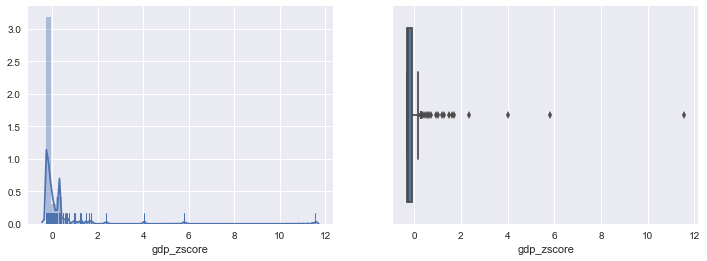

In [17]:
# use seaborn to create a distplot (with rugplot indicators) and boxplot of gdp_zscores to visualize outliers
fig, ax = plt.subplots(1,2,figsize=(12,4))
_ = sns.distplot(df.gdp_zscore,rug =True, ax=ax[0])
_ = sns.boxplot(df.gdp_zscore,ax=ax[1])

In [18]:
# print the top 10 country_code and gdp_zscore sorted by gdp_zscore
df.sort_values('gdp_zscore',ascending=False).head(10)[['country_code','gdp_zscore']]

,country_code,gdp_zscore
203,USA,11.552402
36,CHN,5.807531
98,JPN,4.035723
50,DEU,2.365951
64,FRA,1.717156
68,GBR,1.626685
26,BRA,1.479186
89,IND,1.264916
95,ITA,1.201040
32,CAN,1.007785


In [19]:
# set a zscore cutoff to remove the top 4 outliers
gdp_zscore_cutoff = 2

In [20]:
# create normalized 'population_density_zscore' column
df['population_density_zscore'] = zscore(df.population_density)

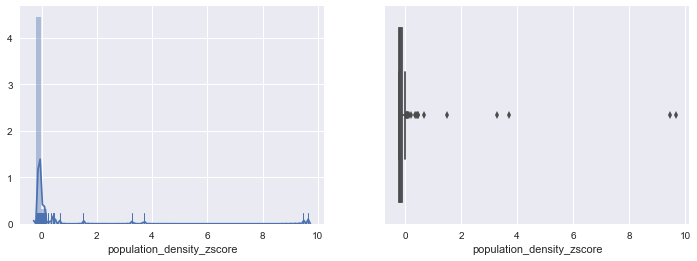

In [21]:
# use seaborn to create a distplot (with rugplot indicators) and boxplot 
# of population_density_zscore to visualize outliers
fig, ax = plt.subplots(1,2,figsize=(12,4))
_ = sns.distplot(df.population_density_zscore,rug =True, ax=ax[0])
_ = sns.boxplot(df.population_density_zscore,ax=ax[1])

In [22]:
# print the top 10 country_code and population_density_zscore sorted by population_density_zscore
df.sort_values('population_density_zscore',ascending=False).head(10)[['country_code','population_density_zscore']]

,country_code,population_density_zscore
118,MAC,9.660487
121,MCO,9.474560
170,SGP,3.703655
82,HKG,3.287870
71,GIB,1.512029
19,BHR,0.662775
124,MDV,0.461115
129,MLT,0.460529
24,BMU,0.443888
17,BGD,0.404138


In [23]:
# set a zscore cutoff to remove the top 5 outliers
population_density_zscore_cutoff = 1

In [24]:
# create normalized 'access_to_electricity_zscore' column
df['access_to_electricity_zscore'] = zscore(df.access_to_electricity)

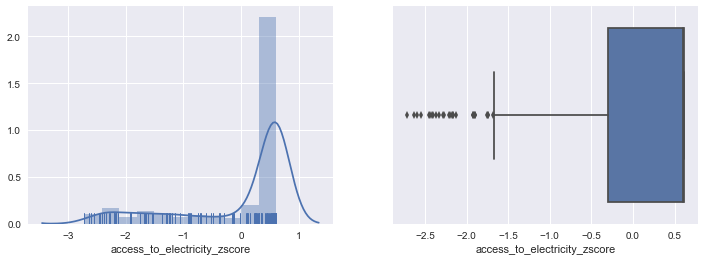

In [25]:
# use seaborn to create a distplot (with rugplot indicators) and boxplot 
# of access_to_electricity_zscore to visualize outliers
fig, ax = plt.subplots(1,2,figsize=(12,4))
_ = sns.distplot(df.access_to_electricity_zscore,rug =True, ax=ax[0])
_ = sns.boxplot(df.access_to_electricity_zscore,ax=ax[1])

In [26]:
# if we were to drop rows with access_to_electricity_zscore less than -2, what proportion of the dataset would we drop?
proportion = len(df[df.access_to_electricity_zscore<-2])/len(df.access_to_electricity_zscore)
print (proportion)

0.08294930875576037


In [27]:
# drop outliers (considering both gdp_zscore and population_density_zscore)
df = df[(df.gdp_zscore<gdp_zscore_cutoff) & (df.population_density_zscore<population_density_zscore_cutoff)]

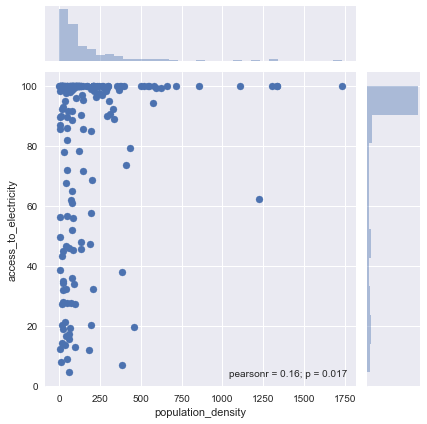

In [28]:
# use seaborn jointplot to plot the interaction between population_density and access_to_electricity
_ = sns.jointplot(df.population_density,df.access_to_electricity)

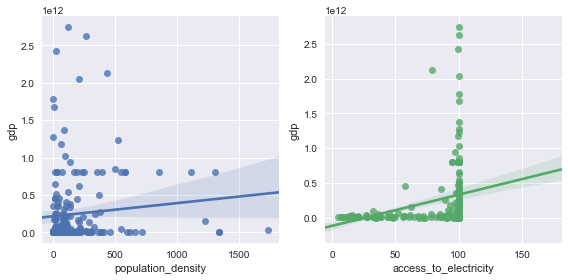

In [29]:
# use seaborn regplot to plot a simple linear regression of
# gdp predicted by population_density and
# gdp predicted by access_to_electricity
fig, ax = plt.subplots(1,2,figsize=(8,4))
_ = sns.regplot(df.population_density,df.gdp,ax=ax[0])
_ = sns.regplot(df.access_to_electricity,df.gdp,ax=ax[1])
_ = plt.tight_layout()

---

## Regression

In [31]:
# create the training set of X features (population_density, access_to_electricity) 
# and label y (gdp)
X = df[['population_density','access_to_electricity']].values
y = df['gdp']

In [32]:
# import and initialize a LinearRegression model using default parameters
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()

In [33]:
# train the regressor on X and y
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# print out the learned intercept and coefficients
print('beta_0 = {:0.3f}'.format(lr.intercept_))
print('beta_1 = {:0.3f}'.format(lr.coef_[0]))
print('beta_2 = {:0.3f}'.format(lr.coef_[1]))

beta_0 = -124604569392.005
beta_1 = 93939617.266
beta_2 = 4350303654.662


In [59]:
ActualGDP = df.loc[df.country_code=='CAN','gdp'].item()
ActualGDP

1779611206826.42

In [79]:
CANpop = df.loc[df.country_code=='CAN','population_density'].item()
CANaccess = df.loc[df.country_code=='CAN','access_to_electricity'].item()
PredictGDP = lr.predict([CANpop,CANaccess]).item()
PredictGDP

C:\Python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


310792985722.39636

In [81]:
# how far off is our model's prediction for Canada's gdp (country_code CAN) from it's actual gdp?
ActualGDP - PredictGDP

1468818221104.0234

In [82]:
# instantiate, train and print the learned parameters, 
# this time forcing the the model to use an intercept of 0 (fit_intercept=False)
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X,y)

print('beta_0 = {:0.3f}'.format(lr2.intercept_))
print('beta_1 = {:0.3f}'.format(lr2.coef_[0]))
print('beta_2 = {:0.3f}'.format(lr2.coef_[1]))

beta_0 = 0.000
beta_1 = 81683338.470
beta_2 = 3020599784.183


In [97]:
# did the prediction for CAN improve?
abs(ActualGDP - lr2.predict([CANpop,CANaccess]).item()) < abs(ActualGDP - PredictGDP)

C:\Python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


False

In [86]:
# create a new training set X that, in addition to population_density and access_to_electricity,
# also includes the region_* dummies
X = df[['population_density','access_to_electricity','region_europe','region_latin_america_and_caribbean',
           'region_middle_east_and_north_africa','region_north_america','region_south_asia',
           'region_subsaharan_africa']].values

In [87]:
# instantiate a new model and train, again with fit_intercept=False
lr3 = LinearRegression(fit_intercept=False)
lr3.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [92]:
CANb1 = df.loc[df.country_code=='CAN','region_europe'].item()
CANb2 = df.loc[df.country_code=='CAN','region_latin_america_and_caribbean'].item()
CANb3 = df.loc[df.country_code=='CAN','region_middle_east_and_north_africa'].item()
CANb4 = df.loc[df.country_code=='CAN','region_north_america'].item()
CANb5 = df.loc[df.country_code=='CAN','region_south_asia'].item()
CANb6 = df.loc[df.country_code=='CAN','region_subsaharan_africa'].item()

In [98]:
# did the prediction for CAN improve?
abs(ActualGDP - lr3.predict([CANpop,CANaccess,CANb1,CANb2,CANb3,CANb4,CANb5,CANb6]).item())< abs(ActualGDP - PredictGDP)

C:\Python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


True

---

## Classification

In [101]:
# set our y labels to now be the income_group categorical values
y = df['income_group']

In [102]:
# import and instantiate a K Nearest Neighbor classifier
# using 3 neighbors and a euclidean distance metric
# train on X,y
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [104]:
knn_result = knn.predict([CANpop,CANaccess,CANb1,CANb2,CANb3,CANb4,CANb5,CANb6]).item()
knn_result

C:\Python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'High income'

In [105]:
# does the predicted income_group for CAN match the true value?
knn_result == df.loc[df.country_code=='CAN','income_group'].item()

True

In [106]:
# import and instantiate a RandomForest classifier
# using 20 trees and a max_depth of 3
# train on X,y
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,max_depth=3)
rf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [108]:
rf_result = rf.predict([CANpop,CANaccess,CANb1,CANb2,CANb3,CANb4,CANb5,CANb6]).item()
rf_result

C:\Python36\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


'High income'

In [109]:
# does the predicted income_group for CAN match the true value?
rf_result == df.loc[df.country_code=='CAN','income_group'].item()

True